## Necessary Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

## 1. Understand the Context and Domain

In [2]:
# Sample data
data = {'patient_id': [1, 2, 3, 4, 5],
    	'glucose_level': [85, 92, 130, 200, 75]}
df = pd.DataFrame(data)

# Use domain knowledge to define outlier threshold
lower_threshold = 70
upper_threshold = 140

# Identify outliers
df['is_outlier'] = df['glucose_level'].apply(lambda x: x < lower_threshold or x > upper_threshold)
print(df)

   patient_id  glucose_level  is_outlier
0           1             85       False
1           2             92       False
2           3            130       False
3           4            200        True
4           5             75       False


In [3]:
# Sample data
data = {'month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    	'sales': [200, 220, 230, 250, 260, 270, 300, 320, 310, 330, 350, 600]}
df = pd.DataFrame(data)

# Contextual knowledge: Define December as a month with expected high sales
expected_high_sales_month = 'Dec'

# Identify outliers considering the context
df['is_outlier'] = df.apply(lambda row: row['sales'] > 500 and row['month'] != expected_high_sales_month, axis=1)
print(df)

   month  sales  is_outlier
0    Jan    200       False
1    Feb    220       False
2    Mar    230       False
3    Apr    250       False
4    May    260       False
5    Jun    270       False
6    Jul    300       False
7    Aug    320       False
8    Sep    310       False
9    Oct    330       False
10   Nov    350       False
11   Dec    600       False


## 2. Visualize the Data

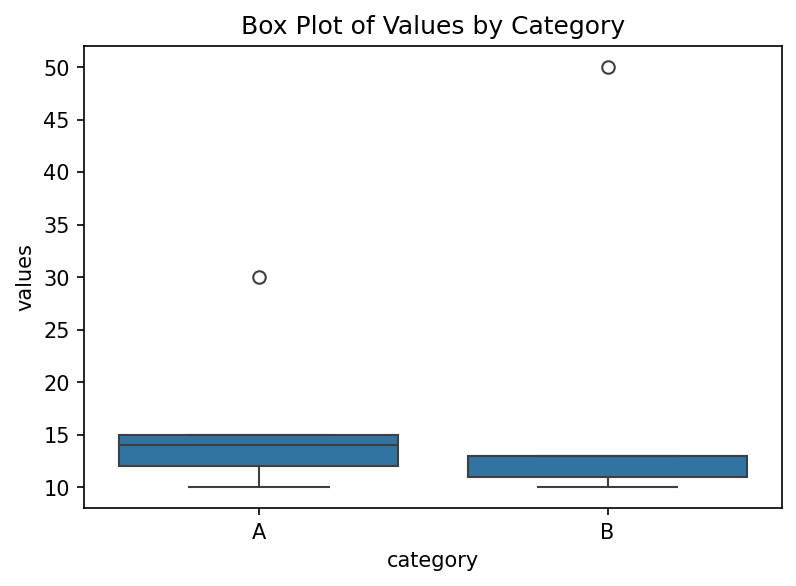

In [4]:
# Sample data
data = {'category': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'],
    	'values': [10, 12, 14, 15, 30, 10, 11, 13, 13, 50]}
df = pd.DataFrame(data)

# Create a box plot
plt.figure(figsize=(6, 4),dpi=150)
sns.boxplot(x='category', y='values', data=df)
plt.title('Box Plot of Values by Category')
plt.show()

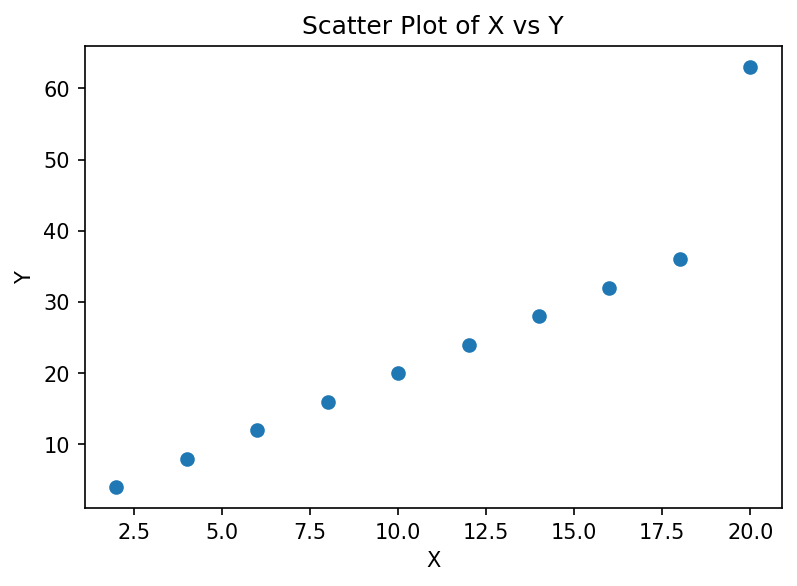

In [5]:
data = {'x': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    	'y': [4, 8, 12, 16, 20, 24, 28, 32, 36, 63]}
df = pd.DataFrame(data)

# Create a scatter plot
plt.figure(figsize=(6, 4),dpi=150)
plt.scatter(df['x'], df['y'])
plt.title('Scatter Plot of X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

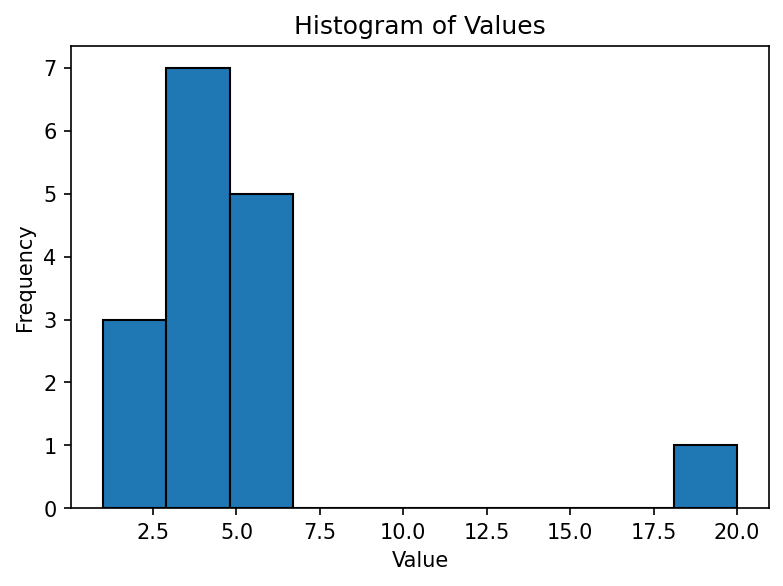

In [6]:
data = {'values': [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 20]}
df = pd.DataFrame(data)

# Create a histogram
plt.figure(figsize=(6, 4),dpi=150)
plt.hist(df['values'], bins=10, edgecolor='black')
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

## 3. Use Statistical Methods

In [7]:
data = {'values': [10, 12, 13, 15, 18, 19, 20, 22, 25, 100]}
df = pd.DataFrame(data)

# Calculate Z-scores
df['z_score'] = (df['values'] - df['values'].mean()) / df['values'].std()

# Identify outliers
threshold = 3
df['is_outlier'] = df['z_score'].abs() > threshold
print(df)

   values   z_score  is_outlier
0      10 -0.578386       False
1      12 -0.503271       False
2      13 -0.465714       False
3      15 -0.390599       False
4      18 -0.277926       False
5      19 -0.240368       False
6      20 -0.202811       False
7      22 -0.127696       False
8      25 -0.015023       False
9     100  2.801794       False


In [8]:
data = {'values': [10, 12, 13, 15, 18, 19, 20, 22, 25, 100]}
df = pd.DataFrame(data)

# Calculate Q1, Q3, and IQR
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['is_outlier'] = (df['values'] < lower_bound) | (df['values'] > upper_bound)
print(df)

   values  is_outlier
0      10       False
1      12       False
2      13       False
3      15       False
4      18       False
5      19       False
6      20       False
7      22       False
8      25       False
9     100        True


## 4. Transform Your Data

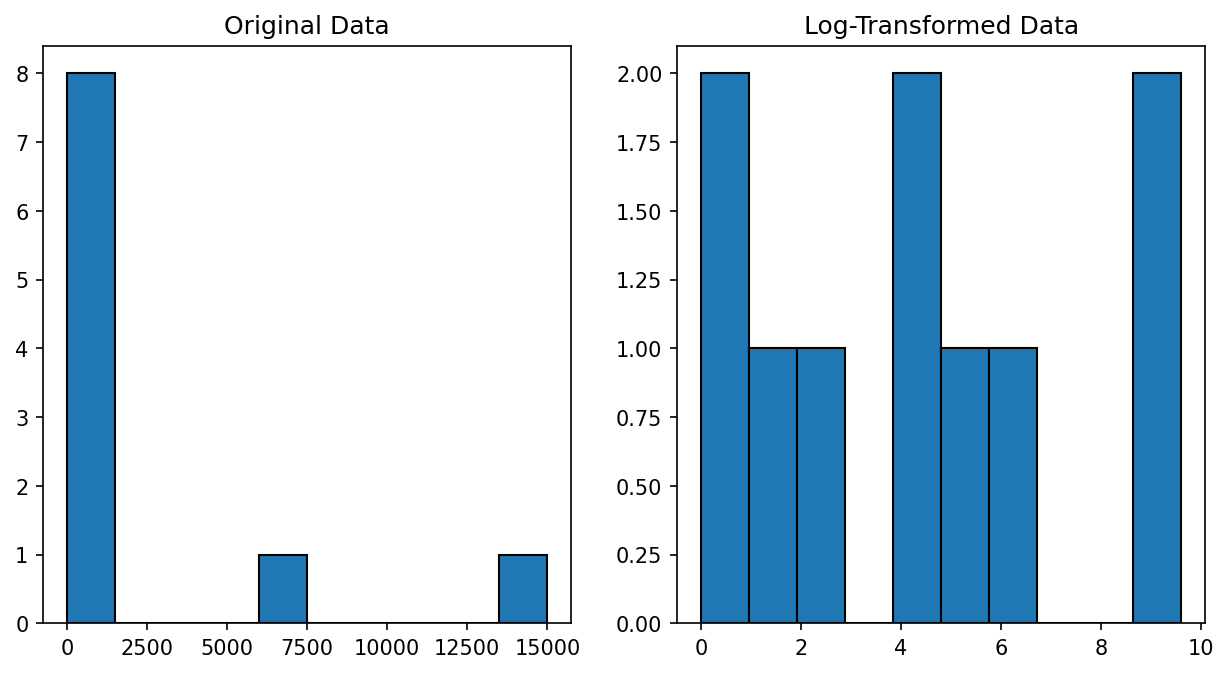

In [9]:
data = {'values': [1, 2, 5, 10, 50, 100, 200, 500, 7000, 15000]}
df = pd.DataFrame(data)

# Apply log transformation
df['log_values'] = np.log(df['values'])

# Plot original vs. log-transformed data
plt.figure(figsize=(10, 5),dpi=150)

plt.subplot(1, 2, 1)
plt.hist(df['values'], bins=10, edgecolor='black')
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.hist(df['log_values'], bins=10, edgecolor='black')
plt.title('Log-Transformed Data')

plt.show()

## 5. Handle Outliers Appropriately

In [10]:
data = {'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    	'test_score': [85, 90, 95, 100, 75, 89, 100, 105, 110, 300]}
df = pd.DataFrame(data)

# Define a threshold to identify outliers (test scores above 150 are considered errors)
threshold = 150

# Remove outliers
df_cleaned = df[df['test_score'] <= threshold]
print(df_cleaned)

   student_id  test_score
0           1          85
1           2          90
2           3          95
3           4         100
4           5          75
5           6          89
6           7         100
7           8         105
8           9         110


In [11]:
data = {'values': [10, 12, 13, 15, 18, 19, 20, 22, 25, 100]}
df = pd.DataFrame(data)

# Define the Winsorization percentiles (e.g., 5th and 95th percentiles)
lower_percentile = 5
upper_percentile = 95

# Calculate the percentile values
lower_value = df['values'].quantile(lower_percentile / 100)
upper_value = df['values'].quantile(upper_percentile / 100)

print(f"lower value: {lower_value:.2f}")
print(f"upper value: {upper_value:.2f}")

# Winsorize the extreme values
df['winsorized_values'] = df['values'].apply(lambda x: max(lower_value, min(x, upper_value)))
print(df)

lower value: 10.90
upper value: 66.25
   values  winsorized_values
0      10              10.90
1      12              12.00
2      13              13.00
3      15              15.00
4      18              18.00
5      19              19.00
6      20              20.00
7      22              22.00
8      25              25.00
9     100              66.25


In [12]:
data = {'person_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    	'age': [25, 30, 35, 40, 28, 32, 36, 38, 150, 200]}
df = pd.DataFrame(data)

# Define a threshold to identify outliers (ages above 100 are considered errors)
threshold = 100

# Calculate the median age based on valid values
median_age = df[df['age'] <= threshold]['age'].median()

# Impute outliers with the median age
df['age_imputed'] = df['age'].apply(lambda x: x if x <= threshold else median_age)
print(df)

   person_id  age  age_imputed
0          1   25         25.0
1          2   30         30.0
2          3   35         35.0
3          4   40         40.0
4          5   28         28.0
5          6   32         32.0
6          7   36         36.0
7          8   38         38.0
8          9  150         33.5
9         10  200         33.5
